In [1]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
#Custom made imports
import single_particle_sector as sps
from time import time

In [2]:
def plot_and_return_projectors_fixed_tau(ns, hf_list, Ut_hf, GS_T_hf, times_fixed_tau, L, N_steps, num_timepoints=100):
    """
    Plot and return time-dependent probabilities P_n for a list of subsystem sizes `ns`
    at fixed tau and varying hf values.

    Parameters:
        ns (list): List of subsystem sizes n to compute P_n.
        hf_list (list): List of final field values.
        Ut_hf (list): Evolved states, structured as Ut_hf[i][t], for i in hf_list and t in time steps.
        GS_T_hf (list): Ground states at each time, structured like Ut_hf.
        times_fixed_tau (list): Time arrays corresponding to each hf.
        L (int): Total system size.
        N_steps (int): Total number of time steps.
        num_timepoints (int): Number of time points to sample from N_steps (default: 100).

    Returns:
        results (dict): Dictionary of the form:
            results[i][n] = (P_t_array, P_gs_array)
            where i indexes the hf_list and n is the subsystem size.
    """
    results = {}

    for i in range(len(hf_list)):
        plt.figure()
        time_indices = list(range(0, N_steps, N_steps // num_timepoints))
        G_t = [sps.G_tfim(Ut_hf[i][ti][:, :L]) for ti in time_indices]
        G_gs = [sps.G_tfim(GS_T_hf[i][ti][:, :L]) for ti in time_indices]
        t_sampled = times_fixed_tau[i][::N_steps // num_timepoints]

        results[i] = {}

        for n in ns:
            P_t = np.array([sps.P_n(n, Gi, L) for Gi in G_t])
            P_gs = np.array([sps.P_n(n, Gi, L) for Gi in G_gs])
            results[i][n] = (P_t, P_gs)

            plt.plot(t_sampled, P_t, label=f"{n}")
            plt.scatter(t_sampled, P_gs, s=5)

        plt.title(f"L = {L}, tau = fixed, hf = {hf_list[i]}")
        plt.legend()
        plt.xlim(times_fixed_tau[i][0], times_fixed_tau[i][-1])
        plt.show()

    return results
def plot_final_all_Pn_vs_h(ns, hf_list, Ut_hf, GS_T_hf, L, N_steps):
    """
    Plot P_n at final time as a function of hf for all ns, overlayed on the same plot.
    Also return the computed values as two numpy arrays.

    Parameters:
        ns (list): List of subsystem sizes n to compute P_n.
        hf_list (list): List of final transverse field values.
        Ut_hf (list): Time-evolved states for each hf.
        GS_T_hf (list): Instantaneous ground states for each hf.
        L (int): System size.
        N_steps (int): Total number of time steps.

    Returns:
        P_t_final_all (np.ndarray): Shape (len(ns), len(hf_list)), evolved values.
        P_gs_final_all (np.ndarray): Shape (len(ns), len(hf_list)), ground values.

        Example:
            P_t_final_all[i, j] = Pₙ for ns[i] at hf_list[j] from evolved state
            P_gs_final_all[i, j] = Pₙ for ns[i] at hf_list[j] from ground state
    """
    P_t_final_all = np.zeros((len(ns), len(hf_list)))
    P_gs_final_all = np.zeros((len(ns), len(hf_list)))

    plt.figure(figsize=(6, 5))

    for i, n in enumerate(ns):
        for j in range(len(hf_list)):
            G_t = sps.G_tfim(Ut_hf[j][-1][:, :L])
            G_gs = sps.G_tfim(GS_T_hf[j][-1][:, :L])
            P_t_final_all[i, j] = sps.P_n(n, G_t, L)
            P_gs_final_all[i, j] = sps.P_n(n, G_gs, L)

        plt.scatter(hf_list, P_t_final_all[i], label=f"n={n}", s=5)
        plt.plot(hf_list, P_gs_final_all[i])

    plt.title(f"Pₙ, tau = {tau}")
    plt.xlabel("hf")
    plt.ylabel("Pₙ")
    plt.legend()
    plt.show()

    return P_t_final_all, P_gs_final_all


In [7]:
# Model Parameters
L = 10
J = -1
h0 = 0
hf_list = np.linspace(0,2,50)
tau = 100
N_steps = 500

# Time Evolved States:
Ut_hf = []
GS_T_hf = []
times_fixed_tau = []

for hf in hf_list:
    times = np.linspace(0, tau, N_steps)

    Ut = sps.TFIM_time_evolve(N_steps, tau, h0, hf, J, L)
    GS_T = []
    for ti in range(N_steps):
        h = sps.h_t(times[ti], tau, h0, hf)
        H = sps.H_bdg(h, L, J)
        E, V = la.eigh(H)
        GS_T.append(V)

    Ut_hf.append(Ut)
    GS_T_hf.append(GS_T)
    times_fixed_tau.append(times)


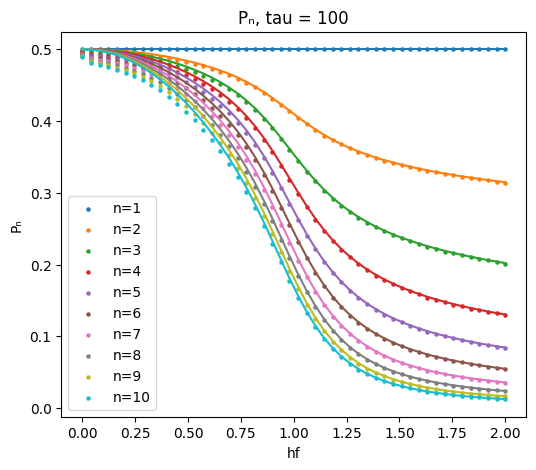

In [8]:
ns = [1,2,3,4,5,6,7,8,9,10]
x =plot_final_all_Pn_vs_h(ns, hf_list, Ut_hf, GS_T_hf, L, N_steps)

Text(0, 0.5, 'I(A;B)')

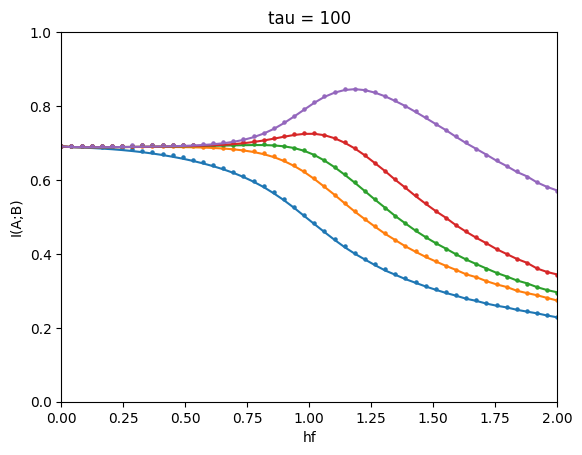

In [9]:
plt.plot(hf_list,np.log(x[0][1]/x[0][0]**2))
plt.plot(hf_list,np.log(x[0][3]/x[0][1]**2))
plt.plot(hf_list,np.log(x[0][5]/x[0][2]**2))
plt.plot(hf_list,np.log(x[0][7]/x[0][3]**2))
plt.plot(hf_list,np.log(x[0][9]/x[0][4]**2))
plt.scatter(hf_list,np.log(x[1][1]/x[1][0]**2),s=5)
plt.scatter(hf_list,np.log(x[1][3]/x[1][1]**2),s=5)
plt.scatter(hf_list,np.log(x[1][5]/x[1][2]**2),s=5)
plt.scatter(hf_list,np.log(x[1][7]/x[1][3]**2),s=5)
plt.scatter(hf_list,np.log(x[1][9]/x[1][4]**2),s=5)
plt.xlim(0,2)
plt.ylim(0,1)
plt.title(f"tau = {tau}")
plt.xlabel("hf")
plt.ylabel("I(A;B)")